# **Task #2**

In [ ]:
# import the libraries
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

Function of two variables of an arbitrary form

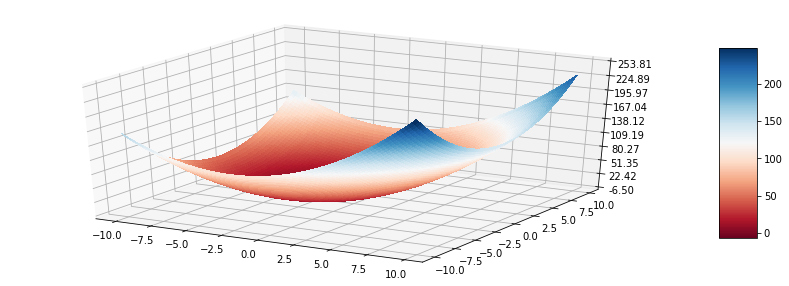

In [ ]:
# objective function of 2 vars
def f(x,y):
    return x**2 + y**2 + 5*x - y

# ploting objective function
x = np.arange(-10, 10, 0.25)
y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

fig = plt.figure(1, figsize = (15, 5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()

In [ ]:
# defining partial derivatives and gradient of objecive function f(x,y) = x**2 + y**2 + 5*x - y
def dfdx(x,y):
    return 2*x + 5

def dfdy(x,y):
    return 2*y - 1

# gradient vector [df/dx, df/dy]
def grad_vector(x,y):
    return np.array([dfdx(x,y), dfdy(x,y)])

Gradient descent (GD) algorithm 

In [ ]:
# defining function-implementation of gradient descent (GD) algorithm
def grad_descent_mult(df,x_prev,learn_rate):
    
    epsilon = 0.00000001
    grad_itter = 1
    
    seq_x = []
    seq_y = []

    steps_len = []

    x_next = np.subtract(x_prev, learn_rate*grad_vector(x_prev[0],x_prev[1]))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    # stopping using norm of difference between steps
    #while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:

    # stopping using f(x,y) difference values
    while abs(f(x_prev[0],x_prev[1]) - f(x_next[0], x_next[1])) > epsilon:
        
        x_prev = x_next
        x_next = x_prev - learn_rate*grad_vector(x_prev[0],x_prev[1])
        grad_itter += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])

        steps_len = np.append(steps_len, np.linalg.norm(np.subtract(x_next,x_prev)))
    
    return (x_next, grad_itter, seq_x, seq_y, steps_len)


# defining function for visualizing GD steps
def contour_plot(x_seq,y_seq, x1):
    plt.figure(1)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0],x1[1],'ro')
    plt.plot(x_seq,y_seq,'ro')
    plt.show()

Process and results of finding an extremum using GD

Minimum (x,y) from gradient descent: [-2.49993287  0.50001185]
Minimum f(x,y) value from gradient descent: -6.499999995353631
Number of gradient descent iterations: 23


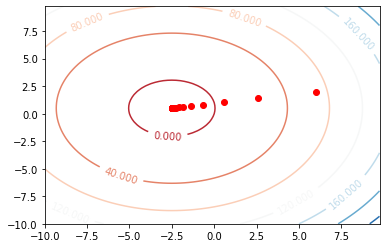

In [ ]:
# finding minimum of the function using GD
grad_output = grad_descent_mult(grad_vector, np.array([6,2]), 0.2)
x_min, y_min = grad_output[0]
steps_grad = grad_output[4]
print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Minimum f(x,y) value from gradient descent: %s' %f(x_min, y_min))
print('Number of gradient descent iterations: %s' %grad_output[1])
contour_plot(grad_output[2],grad_output[3], np.array([6,2]))

Dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N for GD

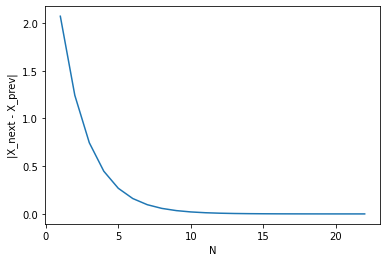

In [ ]:
n_iter = []
for i in range(grad_output[1] - 1):
  n_iter = np.append(n_iter, i+1)

plt.plot(n_iter, steps_grad)
plt.xlabel("N")
plt.ylabel("|X_next - X_prev|")
plt.show()

Adam's optimization algorithm

In [ ]:
# defining ADAM optimization function
def adam_mult(derivative, bounds, alpha, beta1, beta2, n_iter = 100, eps=1e-4):

  seq_x = []
  seq_y = []
  steps_len = []
  adam_iter = 0

	# generating an initial point
  x = np.array([6.0, 2.0])
  seq_x = np.append(seq_x, x[0])
  seq_y = np.append(seq_y, x[1])

	# initializing first and second moments
  m = [0.0 for _ in range(bounds.shape[0])]
  v = [0.0 for _ in range(bounds.shape[0])]

	# running the gradient descent updates
  for t in range(n_iter):
    adam_iter += 1

		# calculating gradient g(t)
    g = grad_vector(x[0], x[1])
  
		# building a solution one variable at a time
    for i in range(x.shape[0]):
    
			# m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
      m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]

			# v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
      v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
			
      # mhat(t) = m(t) / (1 - beta1(t))
      mhat = m[i] / (1.0 - beta1**(t+1))
			
      # vhat(t) = v(t) / (1 - beta2(t))
      vhat = v[i] / (1.0 - beta2**(t+1))
			
      # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
      x[i] = x[i] - alpha * mhat / (math.sqrt(vhat) + eps)

    seq_x = np.append(seq_x, x[0])
    seq_y = np.append(seq_y, x[1])

    steps_len = np.append(steps_len, np.linalg.norm(np.subtract(x,np.array([seq_x[t], seq_y[t]]))))

    if abs(f(seq_x[t],seq_y[t]) - f(x[0], x[1])) < eps:
      break
    
  return (x, adam_iter, seq_x, seq_y, steps_len)

Process and results of finding an extremum using ADAM

Minimum (x,y) from adam:  [-2.4993362   0.49998673]
Minimum f(x,y) value from adam: -6.499999559199151
Number of adam iterations: 181


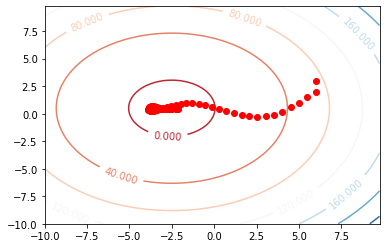

In [ ]:
# finding minimum of the function using ADAM
bounds = np.asarray([[-10.0, 10.0], [-10.0, 10.0]])
alpha = 0.5
beta_1 = 0.9
beta_2 = 0.999
adam_output = adam_mult(grad_vector, bounds, alpha, beta_1, beta_2, n_iter= 10000, eps = 1e-8)
x_min, y_min = adam_output[0]
steps_adam = adam_output[4]
print('Minimum (x,y) from adam: ', adam_output[0])
print('Minimum f(x,y) value from adam: %s' %f(x_min, y_min))
print('Number of adam iterations: %s' %adam_output[1])
contour_plot(adam_output[2],adam_output[3], np.array([6,3]))

Dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N for ADAM

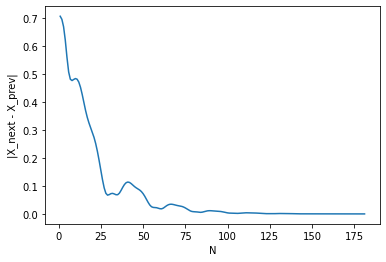

In [ ]:
n_iter = []
for i in range(adam_output[1]):
  n_iter = np.append(n_iter, i+1)

plt.plot(n_iter, steps_adam)
plt.xlabel("N")
plt.ylabel("|X_next - X_prev|")
plt.show()